# Fitting example
An example of fit using the scipy.optimize package

## A 3 level model (inactive state)

In [47]:
from scipy.integrate import odeint
from numpy import *
from matplotlib.pyplot import *
from scipy import *

sys.path.append('../scripts')
from opsine_model_utils.utils import n_pulse
from opsine_model_utils.models import ode_model_generic
%matplotlib inline




First, define the ODE model, used here for data generation AND then fitting

In [ ]:
def ode_model(y, t, A12,A10,B01,A20):
    
    dy=array([  A20*(1-y[0]-y[1]) + A10*y[1] - B01*n_pulse(t)*y[0],
                B01*n_pulse(t)*y[0] - A10*y[1] - A12*y[1] ,
                -A20*(1-y[1]-y[0]) +A12*y[1] ])
        
    return dy

Produce some noisy data

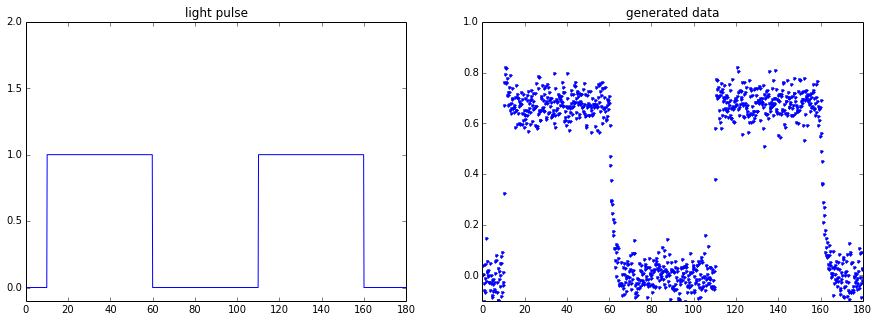

In [94]:
A12=0.5
A10=0.25
B01=5
A20=1.5

t = linspace(0,180,1000)

# produce noise data
y0 = array([1.,0, 0.])
data = odeint(ode_model,y0,t,(A12,A10,B01,A20))[:,1] + 0.05 * randn(size(t))

figure(figsize=(15,5));
subplot(1,2,1);
plot(t,n_pulse(t));
axis([0,180,-0.1,2])
title("light pulse")

subplot(1,2,2)
plot(t,data,'.')
axis([0,180,-0.1,1])
title("generated data");


Define the fit function. Note that the fit function needs the x values (t) and the fit parameters as inputs.

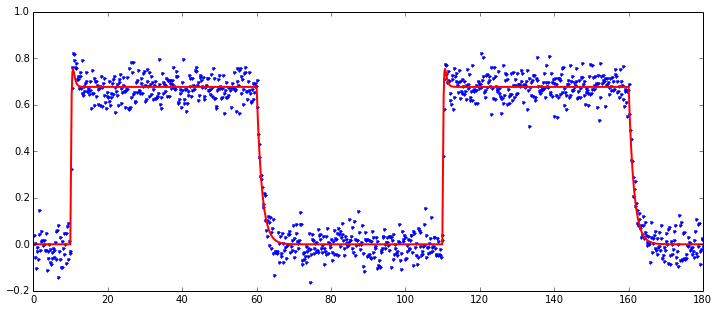

In [109]:

# the fit function solves the ODE model each time it is called.
y0 = array([1.,0, 0.])

def fit_func(t,A12,A10,B01,A20):
    # call to the ODE model function, with the actual parameters
    model = odeint( ode_model,y0,t,(A12,A10,B01,A20) )[:,1]
    return model


popt, pcov = curve_fit(
    fit_func,                        # fit function
    t,                               # x values
    data,                            # data to fit
    p0 = [1,0.25,4,1.0],           # initial guess for the parameters
    sigma = 0.01*ones(shape(t))      # weights (see documentation)
)
# NOTE: maybe setting sigma to all identical vaues is like not setting sigma

# re-assign the parameters with the value obtained with the fit
A12,A10,B01,A20 = popt

# draw the ODE model with the new fitting parameters
fit = odeint(ode_model,y0,t,(A12,A10,B01,A20))[:,1]

figure(figsize=(12,5))
plot( t,data,'.',t,fit, 'r',lw = 2 );

print the fitted parameters

In [111]:
perr = sqrt(diag(pcov))
perr_percent = 100*perr/popt
for i in range(len(perr)):
    print "{0:.2} +- {1:.2}%".format(popt[i] , perr_percent[i] )


0.5 +- 1.0%
0.23 +- 4.3%
4.5 +- 1.8%
1.6 +- 1.1%
